# COVID-19 Trend Analysis & Forecasting using Python



Import Required Libraries
 Purpose

We import all the Python libraries needed for:

Data handling

Visualization

Time-series forecasting

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from prophet import Prophet


Load the Dataset
 Purpose

Read the cleaned COVID-19 dataset into a pandas DataFrame.

In [2]:
df = pd.read_csv("covid_19_clean_complete.csv")
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


df = pd.read_csv("covid_19_clean_complete.csv")
df.head()


# Understand the Dataset Structure      

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


# Data Cleaning & Preprocessing


 Convert Date Column

In [4]:
df['Date'] = pd.to_datetime(df['Date'])


Create Active Cases Column      

In [5]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']


# Global COVID-19 Trend Analysis
# Aggregate Global Data by Date      

In [6]:
global_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
global_df.head()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


## Data is grouped date-wise

## Summation gives worldwide totals per day

# Global Trend Visualization (Plotly)

# Confirmed Cases Over Time

In [7]:
fig = px.line(
    global_df,
    x='Date',
    y='Confirmed',
    title='Global COVID-19 Confirmed Cases Over Time'
)
fig.show()


# India-Specific Analysis      

# Filter India Data

In [8]:
india_df = df[df['Country/Region'] == 'India']
india_df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


# Group India Data by Date      

In [9]:
india_daily = india_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()


In [10]:
india_daily

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


# India Trend Visualization

In [11]:
fig = px.line(
    india_daily,
    x='Date',
    y=['Confirmed', 'Recovered', 'Deaths'],
    title='COVID-19 Trend in India'
)
fig.show()


# Prepare Data for Forecasting (Prophet)      

# Prophet Data Format

In [12]:
prophet_df = global_df[['Date', 'Confirmed']]
prophet_df.columns = ['ds', 'y']
prophet_df.head()


,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


# Train Prophet Model

In [13]:
model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Predict Next 7 Days

In [14]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632021e+07,1.620973e+07,1.642656e+07
189,2020-07-29,1.652998e+07,1.643266e+07,1.663647e+07
190,2020-07-30,1.674392e+07,1.664120e+07,1.684704e+07
191,2020-07-31,1.695911e+07,1.684801e+07,1.706516e+07
192,2020-08-01,1.716677e+07,1.706226e+07,1.727853e+07
193,2020-08-02,1.736430e+07,1.724955e+07,1.747750e+07
194,2020-08-03,1.755889e+07,1.744469e+07,1.767923e+07


yhat → predicted cases

yhat_lower & yhat_upper → confidence interval

Forecast horizon = 7 days

# Visualize Forecast      

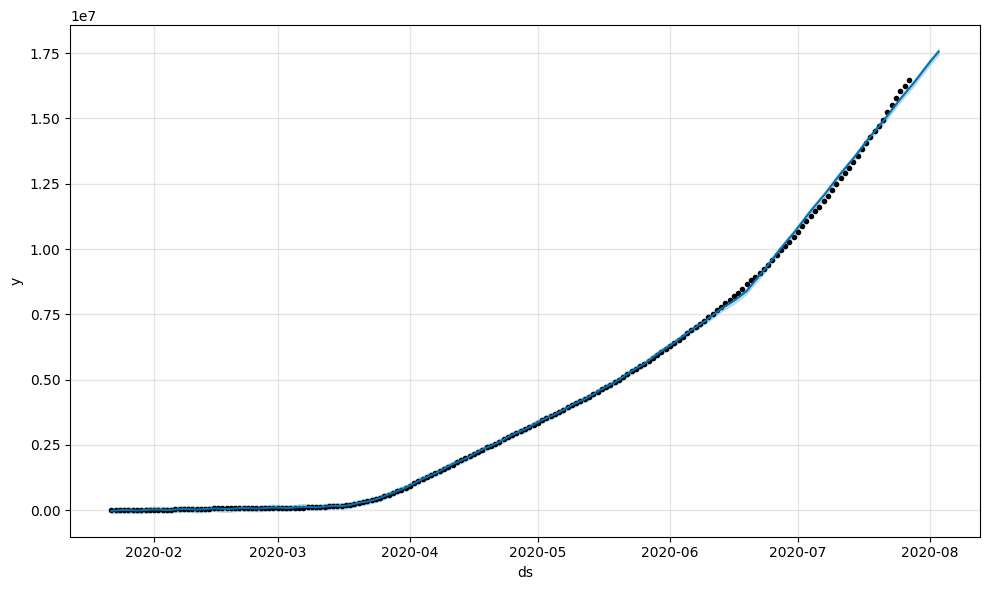

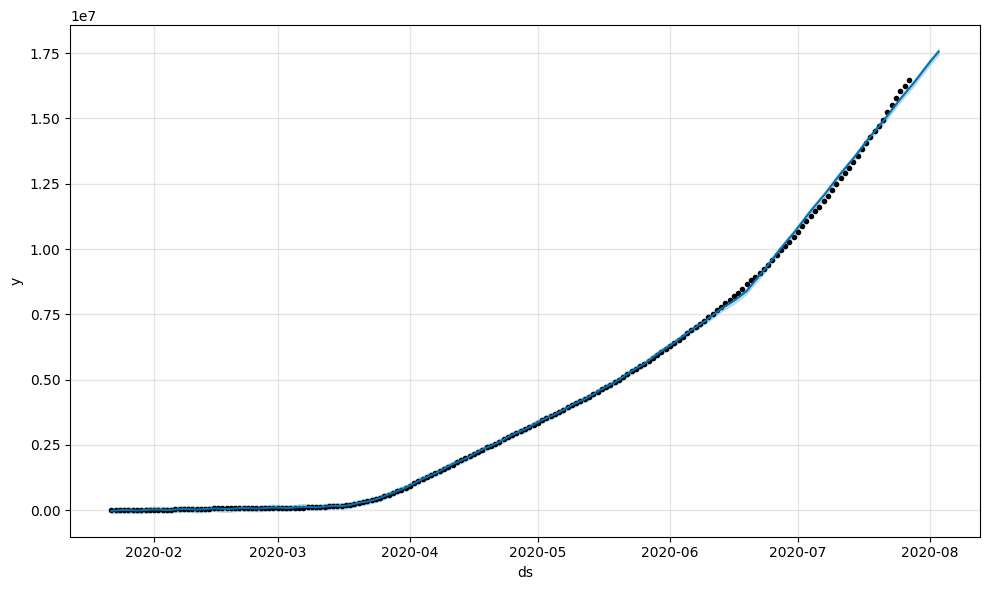

In [15]:
model.plot(forecast)


Blue line → predicted trend

Shaded area → uncertainty range

Shows expected short-term continuation of trend

COVID-19 spread follows exponential growth initially

Recovery rate increases with time

Death rate remains lower than confirmed cases

Short-term predictions align with existing trend

 Successfully analyzed COVID-19 trends

 Built interactive global & India visualizations      

 Forecasted next 7 days using Prophet      

 Combined pandas + plotly + prophet effectively

# Global Mapping of COVID-19 Spread (World Map)

# Prepare Data for Global Mapping
# Purpose

# Aggregate country-wise COVID-19 data so it can be plotted on a world map.

In [17]:
# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate data by Country and Date
world_map_df = df.groupby(
    ['Country/Region', 'Date']
)[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

world_map_df.head()


,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Afghanistan,2020-01-23,0,0,0,0
2,Afghanistan,2020-01-24,0,0,0,0
3,Afghanistan,2020-01-25,0,0,0,0
4,Afghanistan,2020-01-26,0,0,0,0


# Static Global Map (Latest Date)
# Purpose

# Show the current global COVID-19 impact on a world map.

In [18]:
latest_date = world_map_df['Date'].max()

latest_world = world_map_df[world_map_df['Date'] == latest_date]

fig = px.choropleth(
    latest_world,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    hover_data=["Confirmed", "Deaths", "Recovered", "Active"],
    color_continuous_scale="Reds",
    title="Global COVID-19 Confirmed Cases (Latest Data)"
)

fig.show()


# Animated Global Map (Spread Over Time)

# This is the most impressive part of the notebook

# Purpose

# Visualize how COVID-19 spread across the world over time.

In [19]:
fig = px.choropleth(
    world_map_df,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    animation_frame=world_map_df['Date'].dt.strftime('%Y-%m-%d'),
    color_continuous_scale="Reds",
    title="Global Spread of COVID-19 Over Time"
)

fig.show()


# Global Active Cases Map

In [20]:
fig = px.choropleth(
    latest_world,
    locations="Country/Region",
    locationmode="country names",
    color="Active",
    hover_name="Country/Region",
    color_continuous_scale="Oranges",
    title="Global Active COVID-19 Cases"
)

fig.show()
